# **CASE STUDY**

[link text](https://https://docs.google.com/document/d/1-y4tE5FYv81mI5-KKfpRdLkg3J4oskV6/edit)

In [ ]:
# Import libaries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

**Data Story**


In [ ]:
# Insert data

data = {
    'Jumlah_Kecelakaan': [107,113,117,129,137,99,112,114,126,101,116,103],
    'Faktor_Pengemudi': [56,63,60,61,77,54,56,56,60,65,56,59],
    'Faktor_Jalan': [31,23,27,33,31,20,30,27,20,17,32,29],
    'Faktor_Kendaraan': [12,15,14,9,18,11,10,11,13,9,21,14],
    'Pertumbuhan_Kendaraan': [873,402,538,432,746,393,746,799,516,493,871,904]
}
df = pd.DataFrame(data)

In [ ]:
df.head()

,Jumlah_Kecelakaan,Faktor_Pengemudi,Faktor_Jalan,Faktor_Kendaraan,Pertumbuhan_Kendaraan
0,107,56,31,12,873
1,113,63,23,15,402
2,117,60,27,14,538
3,129,61,33,9,432
4,137,77,31,18,746


In [ ]:
df.dtypes

Jumlah_Kecelakaan        int64
Faktor_Pengemudi         int64
Faktor_Jalan             int64
Faktor_Kendaraan         int64
Pertumbuhan_Kendaraan    int64
dtype: object

**Question**
1. Which factors, impact the most to road accident?
2. The growing vehicles owner, is it impacted the accident as well?

In [ ]:
# Sizing
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

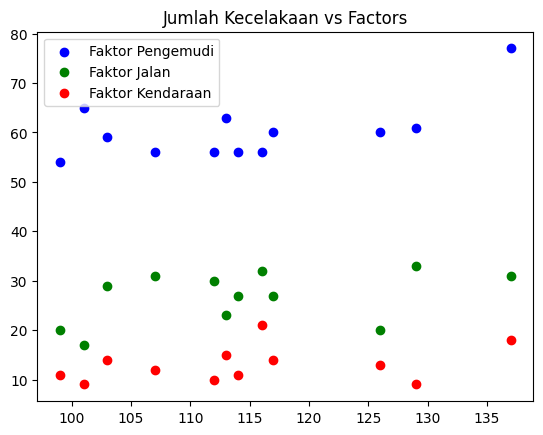

In [ ]:
# Scatter Ploting

plt.scatter(df['Jumlah_Kecelakaan'], df['Faktor_Pengemudi'], color='blue', label='Faktor Pengemudi')
plt.scatter(df['Jumlah_Kecelakaan'], df['Faktor_Jalan'], color='green', label='Faktor Jalan')
plt.scatter(df['Jumlah_Kecelakaan'], df['Faktor_Kendaraan'], color='red', label='Faktor Kendaraan')

plt.title('Jumlah Kecelakaan vs Factors')
plt.legend()
plt.show()

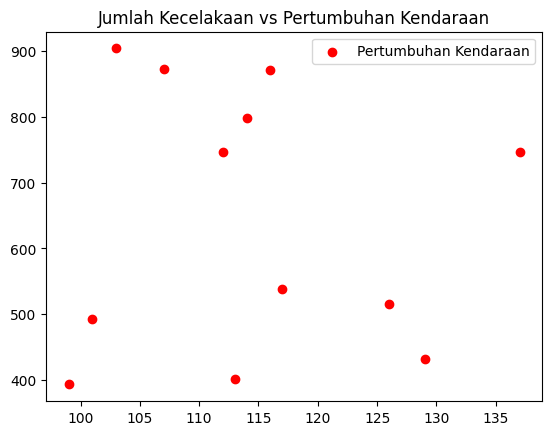

In [ ]:
# Scatter Ploting 2

plt.scatter(df['Jumlah_Kecelakaan'], df['Pertumbuhan_Kendaraan'], color='red', label='Pertumbuhan Kendaraan')

plt.title('Jumlah Kecelakaan vs Pertumbuhan Kendaraan')
plt.legend()
plt.show()

In [ ]:
# Import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Model Regression and Comparing

def linear_regression_model_2(x, y):
    x_reshaped = np.array(x).reshape(-1, 1)
    y_reshaped = np.array(y).reshape(-1, 1)

    # Linear Regression
    model = LinearRegression()
    model.fit(x_reshaped, y_reshaped)
    y_pred = model.predict(x_reshaped)

    # Calculating metrics
    mse = mean_squared_error(y_reshaped, y_pred)
    r2 = r2_score(y_reshaped, y_pred)

    return model.intercept_[0], model.coef_[0][0], mse, r2

# Dictionary to store the results
results = {
    'Factor': [],
    'Intercept': [],
    'Coefficient': [],
    'MSE': [],
    'R2_Score': []
}

# Perform linear regression for each factor
factors = ['Faktor_Pengemudi', 'Faktor_Jalan', 'Faktor_Kendaraan', 'Pertumbuhan_Kendaraan']
for factor in factors:
    intercept, coefficient, mse, r2 = linear_regression_model_2(df[factor], df['Jumlah_Kecelakaan'])
    results['Factor'].append(factor)
    results['Intercept'].append(intercept)
    results['Coefficient'].append(coefficient)
    results['MSE'].append(mse)
    results['R2_Score'].append(r2)

# Create a new DataFrame with the results
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

                  Factor   Intercept  Coefficient         MSE  R2_Score
0       Faktor_Pengemudi   48.391868     1.097230   80.519937  0.345810
1           Faktor_Jalan   89.981172     0.919456  100.633281  0.182397
2       Faktor_Kendaraan  100.461185     1.073030  109.178647  0.112970
3  Pertumbuhan_Kendaraan  115.869859    -0.002131  122.919316  0.001333
